In [1]:
# reload modules if needed
%load_ext autoreload
%autoreload 2

In [2]:
import json
import os


import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import seaborn as sns


import itertools
from flexitext import flexitext
from adjustText import adjust_text


Setting up figure environment

In [3]:
FIGURE_DIR = "/home/limisiewicz/my-luster/entangled-in-scripts/output/figures"
TABLE_DIR =  "/home/limisiewicz/my-luster/entangled-in-scripts/output/tables"

In [4]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['text.usetex'] = True
#plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.serif'] = ['Times New Roman']

# plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 26
plt.rcParams['axes.labelsize'] = 22
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams['axes.titlesize'] = 26
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16

S-correlations with VA scores (CPT) and VO scores (-JSD) correlations.

In [5]:
va_rs = {'MLM': -.913, 'NER': .657, 'POS': .724, 'Dependency\nLabeling': .675, 'NLI': .388, 'Sentence\nRetrieval': 0.0}
vo_rs = {'MLM': 0.0, 'NER': .111, 'POS': -.395, 'Dependency\nLabeling': -.563, 'NLI': .516, 'Sentence\nRetrieval': .648}
task_groups = {'MLM': 0, 'NER': 1, 'POS': 1, 'Dependency\nLabeling': 1, 'NLI': 2, 'Sentence\nRetrieval': 2}

In [6]:
# Colors
BG_WHITE = "#fbf9f4"
GREY_LIGHT = "#b4aea9"
GREY50 = "#7F7F7F"
GREY30 = "#4d4d4d"
BLUE_DARK = "#1B2838"
BLUE = "#2a475e"
COLORS = ["#48908F", "#86ACE8", "#F5C046" ] # A color for each species


# Horizontal lines
LINES = [0.]

# Vertical and horizontal tick marks
TICKS = [-1.,0.,1.]


# The markers we use in the scatterplot
MARKERS = ["o", "s", "^"] # circle, triangle, square

TASK_GROUPS = ['Pre-training', "Word level", "Sentence level"]

TASKS = list(va_rs.keys())

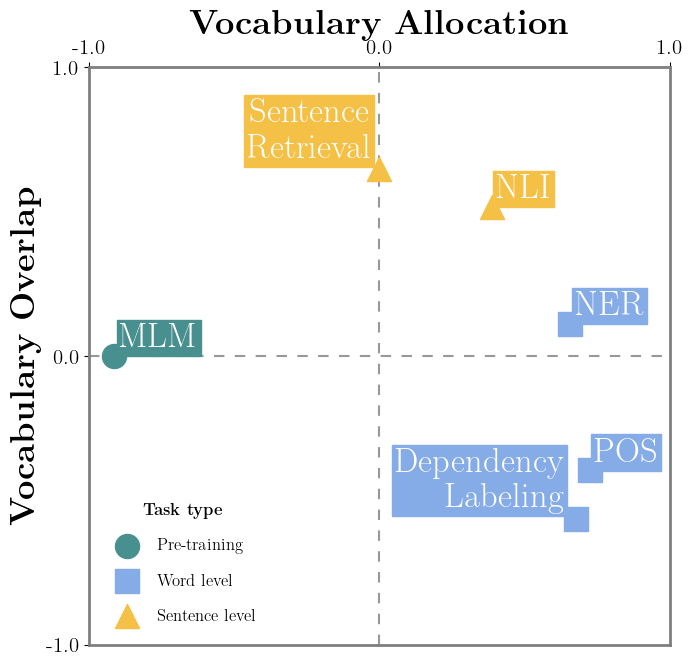

In [16]:
# Initialize layout ----------------------------------------------
fig, ax = plt.subplots(figsize= (7.5, 7.5))

# Background color
# fig.patch.set_facecolor(BG_WHITE)
# ax.set_facecolor(BG_WHITE)

# Horizontal lines in the background
for l in LINES:
    ax.axhline(l, color=GREY50, ls=(0, (5, 5)), alpha=0.8, zorder=0)
    ax.axvline(l, color=GREY50, ls=(0, (5, 5)), alpha=0.8, zorder=0)
    
    

# Add scatterplot  -----------------------------------------------
# Loop through species, colors, and markers.
# Each species receives a different combination of color and marker.
for ti, task_g in enumerate(TASK_GROUPS):
    xs = [va_r for task, va_r in va_rs.items() if task_groups[task] == ti ]
    ys = [vo_r for task, vo_r in vo_rs.items() if task_groups[task] == ti ]
    ax.scatter(
        xs, ys, s=300, color=COLORS[ti], 
        marker=MARKERS[ti], alpha=1., label=TASK_GROUPS[ti]
    )
    


# Hide spines
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")

# Customize spines color
ax.spines["left"].set_color(GREY50)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_color(GREY50)
ax.spines["bottom"].set_linewidth(2)
ax.spines["right"].set_color(GREY50)
ax.spines["right"].set_linewidth(2)
ax.spines["top"].set_color(GREY50)
ax.spines["top"].set_linewidth(2)


ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.set_xticks(TICKS)
ax.set_xticklabels(TICKS, fontname="Times New Roman", size=15)
ax.set_xlabel(r"\textbf{Vocabulary Allocation}", fontname="Times New Roman", size=25, weight="bold")

ax.set_yticks(TICKS)
ax.set_yticklabels(TICKS, fontname="Times New Roman", size=15)
ax.set_ylabel(r"\textbf{Vocabulary Overlap}", fontname="Times New Roman", size=25, weight="bold")

TEXTS = []

for task in TASKS:
    task_g = task_groups[task]
    color=COLORS[task_g]
    x = va_rs[task]
    y = vo_rs[task]
    text = task
    TEXTS.append(ax.text(x, y, text, color='white',fontsize=25,
                         fontname="Times New Roman", weight='bold',
                         ha='center', va='center',
                        bbox=dict(facecolor=color, edgecolor=color, pad=2.0)))
    
adjust_text(
    TEXTS, 
    expand_points=(1.15,1.15),
#     arrowprops=dict(
#         arrowstyle="->", 
#         color=GREY50, 
#         lw=2
#     ),
    ax=fig.axes[0]
)
# Adding legen

legend = ax.legend(
    loc=(0.025, 0.025), # bottom-left
    labelspacing=1.2,  # add space between labels
    markerscale=1.,   # increase marker size
    fontsize=12,
    frameon=False      # don't put a frame
)

legend.set_title(r"\textbf{Task type}")
legend_title = legend.get_title()
legend_title.set_fontname("Times New Roman")
legend_title.set_fontweight("bold")
legend_title.set_fontsize(12)
legend_title.set_ha("left")

Saving figure

In [17]:
fig.tight_layout()#rect=[0, 0,0.92, 1])
fig.savefig(os.path.join(FIGURE_DIR, "Schwartz_camread.png"), dpi=300)
fig.savefig(os.path.join(FIGURE_DIR, "Schwartz_camread.pdf"), dpi=300)
fig.show()

/tmp/ipykernel_1191306/3102860902.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
